# Authors: 
**Alejandro C Parra** https://github.com/athanatos96


**Atreish Ramlakhan** https://github.com/atreish


**Ruslan Gokhman** https://github.com/Gokhman07

In [1]:
from typing import List

# 91. Decode Ways

A message containing letters from A-Z can be encoded into numbers using the following mapping:


'A' -> "1"

'B' -> "2"

...

'Z' -> "26"


To decode an encoded message, all the digits must be grouped then mapped back into letters using the reverse of the mapping above (there may be multiple ways). For example, "11106" can be mapped into:

+ "AAJF" with the grouping (1 1 10 6)
+ "KJF" with the grouping (11 10 6)

Note that the grouping (1 11 06) is invalid because "06" cannot be mapped into 'F' since "6" is different from "06".

Given a string s containing only digits, return the number of ways to decode it.

The test cases are generated so that the answer fits in a 32-bit integer.

## Option 1, Slow

In [7]:
class Solution:
    def numDecodings(self, s: str) -> int:
        def func(word):
            output = []
            paths_fin = 0

            # The first letter cannot be a 0
            if word[0] == "0":
                return (output, paths_fin)

            word_len = len(word)

            # Case of 1 number
            if word_len == 1:
                # Only 1 number, we have finished
                paths_fin +=1
            else:
                # If not only 1 number, we add the rest of the word
                output.append(word[1:])
            
            # to evaluate 2 numbers letter, we need to check that there are
            # at least 2 numbers, and they are 26 or smaller
            if len(word)>=2 and int(word[0:2]) <= 26:
                if word_len == 2:
                    # Only 2 number, we have finished
                    paths_fin +=1
                else:
                    # If not only 2 number, we add the rest of the word
                    output.append(word[2:])
            
            return (output, paths_fin)


        # Stack of pending words
        list_of_words = [s] 
        paths = 0
        if len(list_of_words)==0: return 0

        # Iterate until empty stack

        while 0 < len(list_of_words):
            #print(list_of_words,paths)

            # Extract the first element
            elem = list_of_words.pop(0)
            #print(type(list_of_words))

            # Evaluate the begining of the word
            new_words, finished_paths = func(elem)
            #print("after func")

            # increase the paths, by the amount of finished paths
            paths += finished_paths

            # add the new words to the list
            list_of_words.extend(new_words)
        
        #print(f"Total: {paths}")
        return paths

In [8]:
solver = Solution

s = "12"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

s = "226"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

s = "06"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")


s: 12, Output: 2
s: 226, Output: 3
s: 06, Output: 0


In [16]:
import datetime

t1 = datetime.datetime.now()
print(f"started at {t1}")

s = "111111111111111111111111111"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2023-02-22 16:23:36.518313
s: 111111111111111111111111111, Output: 317811
ended at 2023-02-22 16:23:50.944760
time elapsed: 0:00:14.426447


## Option 2, Fast

In [17]:
class Solution:
    def numDecodings(self, s: str) -> int:
        # if the first character is '0', return 0
        if not s or s[0] == '0': 
            return 0
        n = len(s)
        # create an array of length n + 1 to store number of ways
        dp = [0] * (n + 1) 
        # initialize the first two elements as 1, as there is 1 way to decode empty string and 1 character
        dp[0] = 1 
        dp[1] = 1
        for i in range(2, n + 1):
            # if current character is not '0', then it can be a single digit
            if s[i - 1] != '0':
                # add the number of ways to decode the substring ending at i - 1
                dp[i] += dp[i - 1] 
            # if the current and previous character together can be decoded
            if s[i - 2] == '1' or (s[i - 2] == '2' and s[i - 1] <= '6'): 
                # add the number of ways to decode the substring ending at i - 2
                dp[i] += dp[i - 2] 
        # return the number of ways to decode the complete string
        return dp[n] 

In [18]:
solver = Solution

s = "12"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

s = "226"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

s = "06"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

s: 12, Output: 2
s: 226, Output: 3
s: 06, Output: 0


In [19]:
import datetime

t1 = datetime.datetime.now()
print(f"started at {t1}")

s = "111111111111111111111111111"
print(f"s: {s}, Output: {solver.numDecodings(solver, s)}")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2023-02-22 16:23:51.001573
s: 111111111111111111111111111, Output: 317811
ended at 2023-02-22 16:23:51.001573
time elapsed: 0:00:00


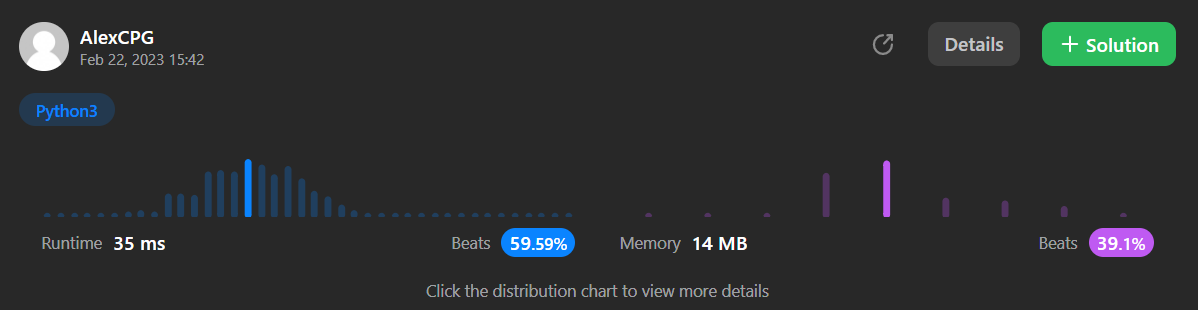